In [1]:
import pandas as pd
import numpy as np

In [2]:
df_can = pd.read_excel('Canada.xlsx', 
    sheet_name='Canada by Citizenship', 
    skiprows=range(20), 
    skipfooter=2)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.DevName.value_counts()

DevName
Developing regions    147
Developed regions      48
Name: count, dtype: int64

In [5]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [6]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [7]:
df_can.drop(['Type', 'Coverage', 'AREA', 'DEV', 'REG'], axis = 1, inplace = True)
df_can.columns.values

array(['OdName', 'AreaName', 'RegName', 'DevName', 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

In [8]:
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head(1)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


In [9]:
kolom_numerik = df_can.columns[4:-1]
df_can['Total'] = df_can[kolom_numerik].sum(axis=1)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,56635
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15096
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,65108
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,14


In [10]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [11]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,31546.748718
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,87923.328468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,857.500000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,4895.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,21907.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,658817.000000


In [12]:
# df_can.Country
df_can[['Country',2000,1982]]

,Country,2000,1982
0,Afghanistan,3326,39
1,Albania,1816,0
2,Algeria,2867,71
3,American Samoa,0,0
4,Andorra,0,0
...,...,...,...
190,Viet Nam,1803,2162
191,Western Sahara,0,0
192,Yemen,122,1
193,Zambia,39,11


In [13]:
df_can.set_index('Country', inplace=True)

In [14]:
df_can.index.name = None

In [15]:
df_can.loc['Indonesia']
df_can.iloc[87]
df_can[df_can.index == 'Indonesia'].T.squeeze()

Continent                  Asia
Region       South-Eastern Asia
DevName      Developing regions
1980                        186
1981                        178
1982                        252
1983                        115
1984                        123
1985                        100
1986                        127
1987                        213
1988                        270
1989                        260
1990                        227
1991                        252
1992                        243
1993                        278
1994                        262
1995                        205
1996                        231
1997                        166
1998                        165
1999                        525
2000                       1138
2001                        907
2002                        709
2003                        515
2004                        552
2005                        632
2006                        613
2007                        657
2008    

In [16]:
df_can.loc['Japan', 2013]
df_can.iloc[87,36]

982

In [17]:
df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1985]]
df_can.iloc[87,[3,4,5,6,7,8]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

In [18]:
# changing column name type to str
df_can.columns = list(map(str, df_can.columns))
df_can.loc['Japan', '2013']

982

In [19]:
# making list of string for year column
years = list(map(str, range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [20]:
condition = df_can['Continent'] == 'Asia'
condition1 = df_can['Region'] == 'Southern Asia'
# df_can[condition & condition1]
df_sea = df_can[(df_can['Continent'] == 'Asia') & (df_can['Region'] == 'Southern Asia')]
df_sea.head(1)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,56635


In [21]:
df_sea.loc['Afghanistan','Continent']
df_sea.iloc[0,2]

'Developing regions'

## Matplotlib

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [23]:
haiti = df_can[df_can.index == 'Haiti'][years].T.squeeze()

<Axes: >

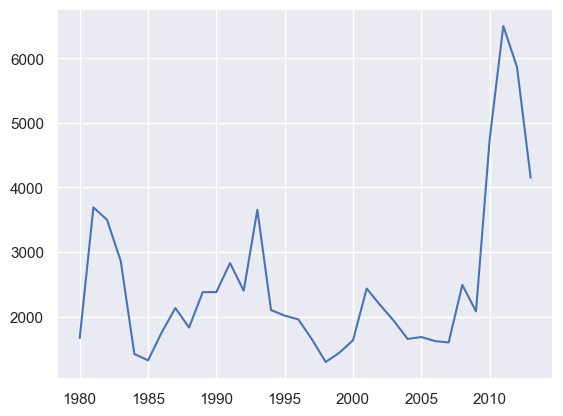

In [24]:
haiti.plot()

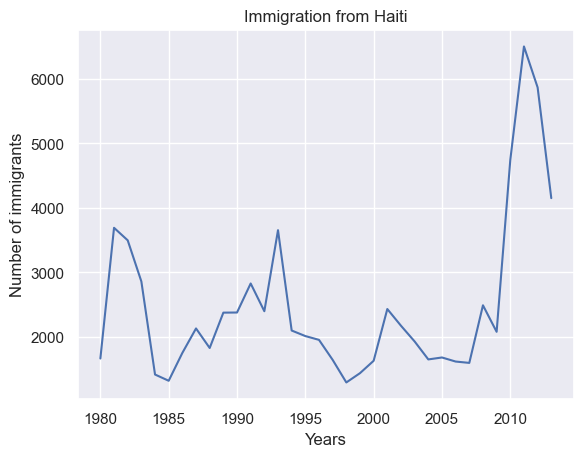

In [25]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting haiti.plot(kind='line')
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show() # need this line to show the updates made to the figure

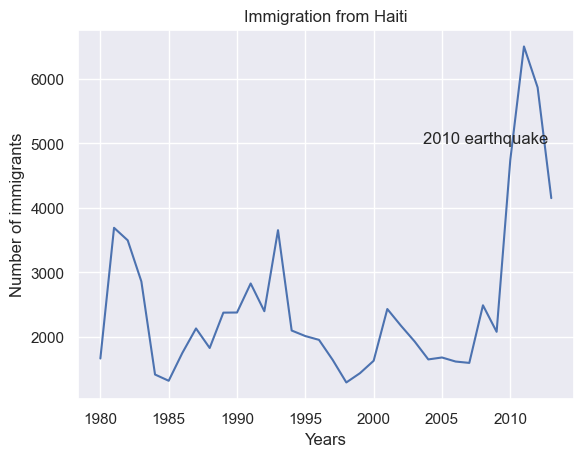

In [26]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting haiti.plot(kind='line')
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

# annotate 2010 earthquake
# syntax: plt.text(x, y, annotation)
plt.text(2003.6, 5000, '2010 earthquake')
plt.show() # need this line to show the updates made to the figure

In [27]:
china_india = df_can.loc[['China','India'], years]
china_india

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<Axes: >

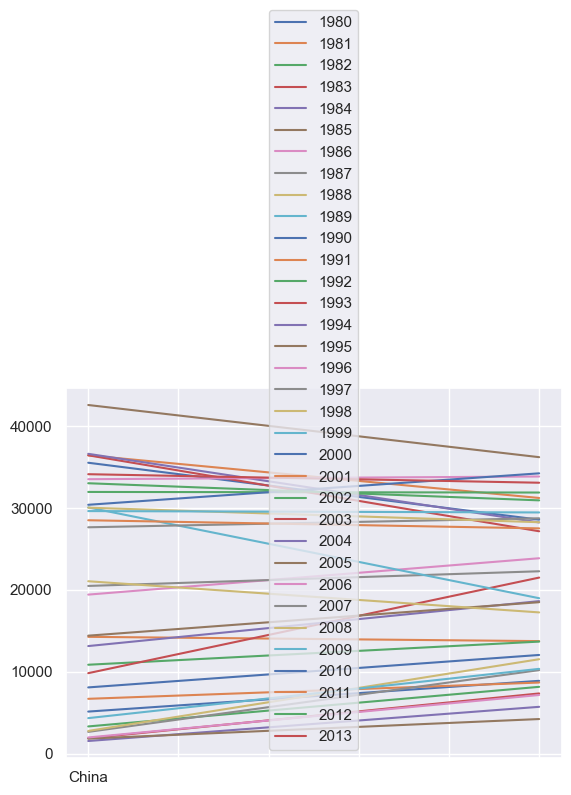

In [28]:
china_india.plot(kind='line')

In [29]:
df_CI = china_india.transpose()
df_CI

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


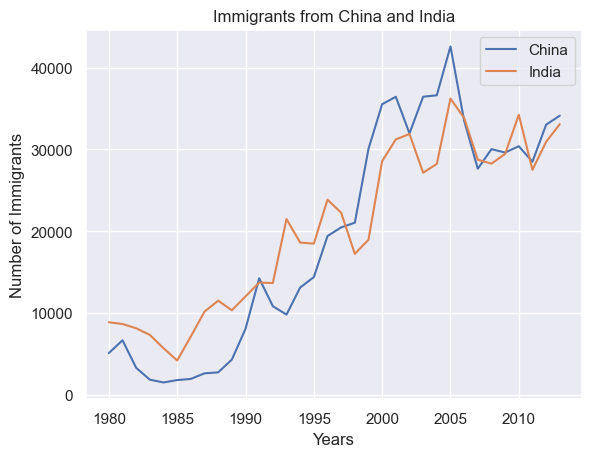

In [30]:
df_CI.plot()
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

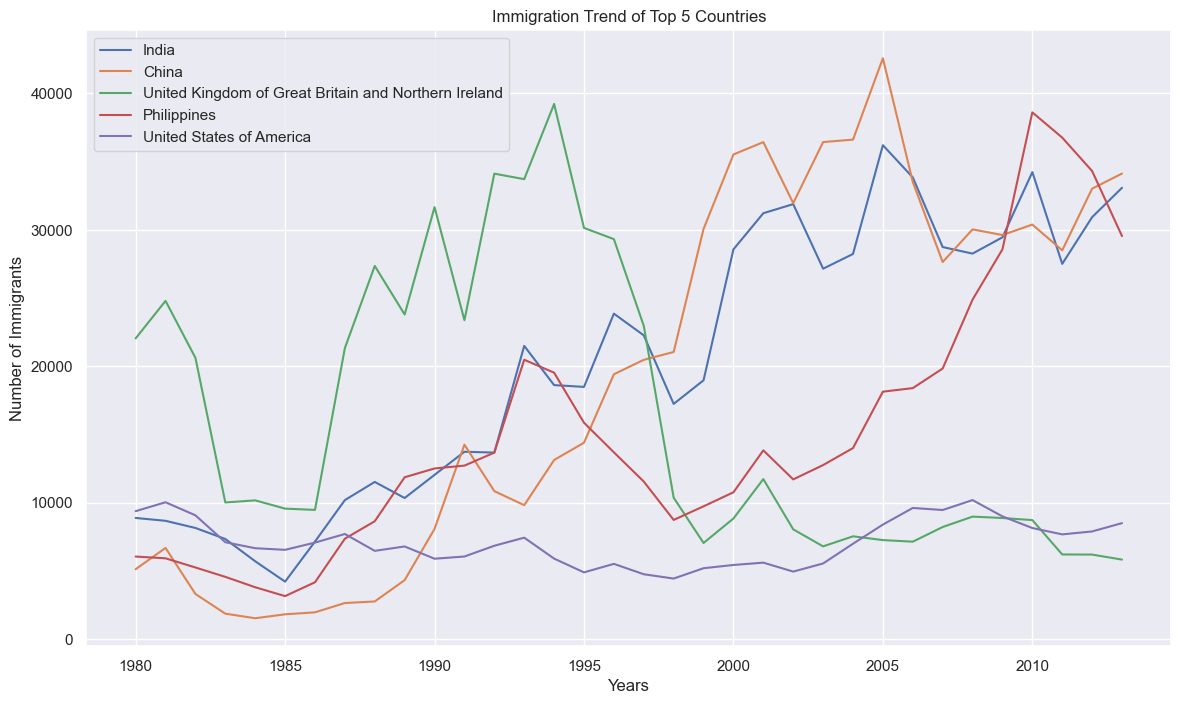

In [32]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5 [years].transpose()
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Top 5 Countries') 
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [33]:
df_top5

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,United States of America
1980,8880,5123,22045,6051,9378
1981,8670,6682,24796,5921,10030
1982,8147,3308,20620,5249,9074
1983,7338,1863,10015,4562,7100
1984,5704,1527,10170,3801,6661
1985,4211,1816,9564,3150,6543
1986,7150,1960,9470,4166,7074
1987,10189,2643,21337,7360,7705
1988,11522,2758,27359,8639,6469
1989,10343,4323,23795,11865,6790


## Area Chart

In [34]:
df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,United States of America
1980,8880,5123,22045,6051,9378
1981,8670,6682,24796,5921,10030
1982,8147,3308,20620,5249,9074
1983,7338,1863,10015,4562,7100
1984,5704,1527,10170,3801,6661


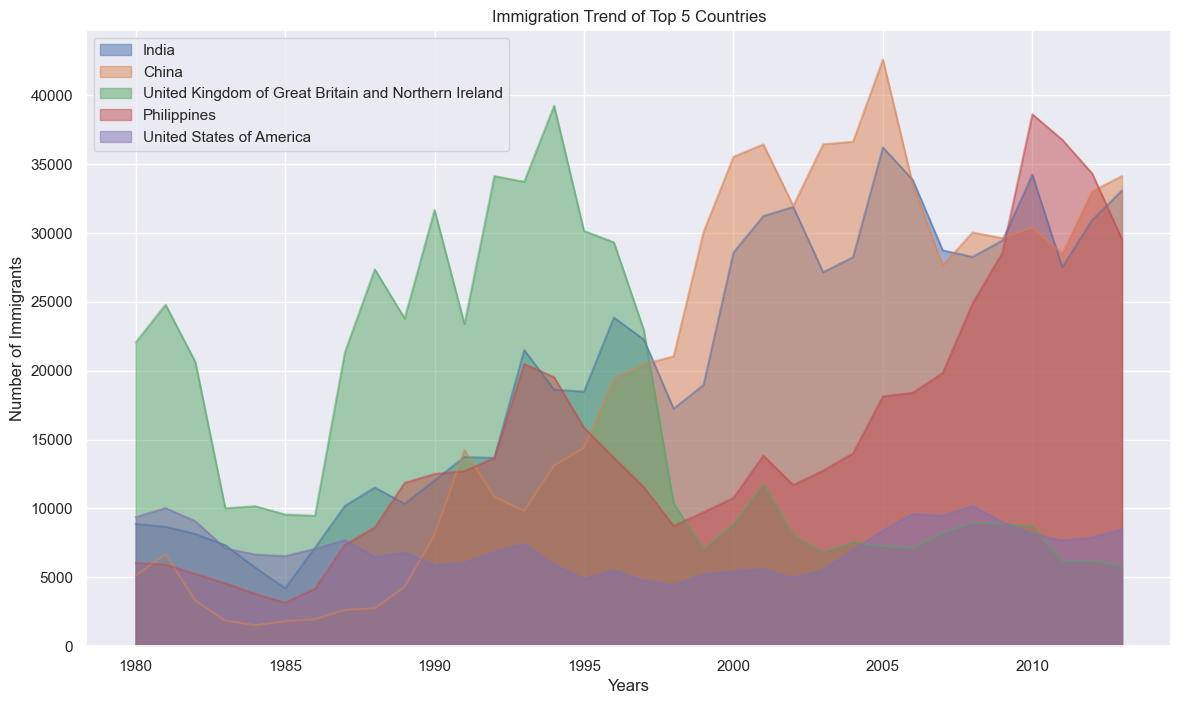

In [35]:
df_top5.plot(kind='area', stacked=False, figsize=(14,8))
plt.title('Immigration Trend of Top 5 Countries') 
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

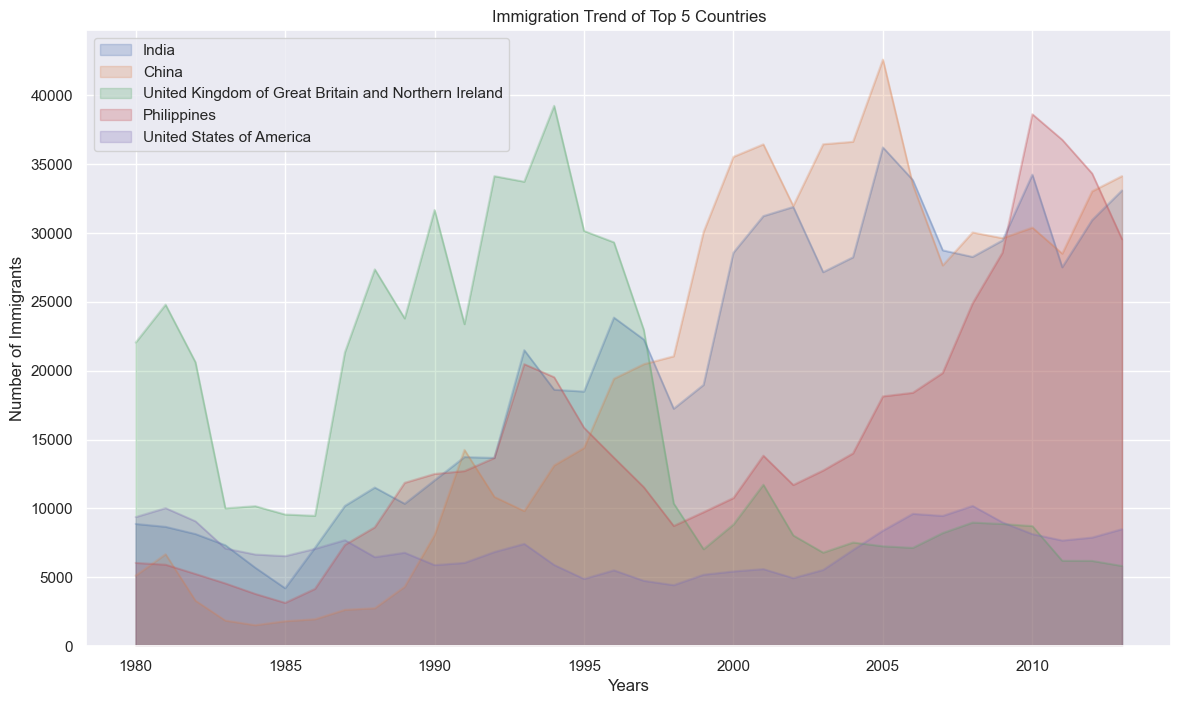

In [36]:
df_top5.plot(kind='area', stacked=False, figsize=(14,8), alpha=0.25)
plt.title('Immigration Trend of Top 5 Countries') 
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Text(0.5, 0, 'Years')

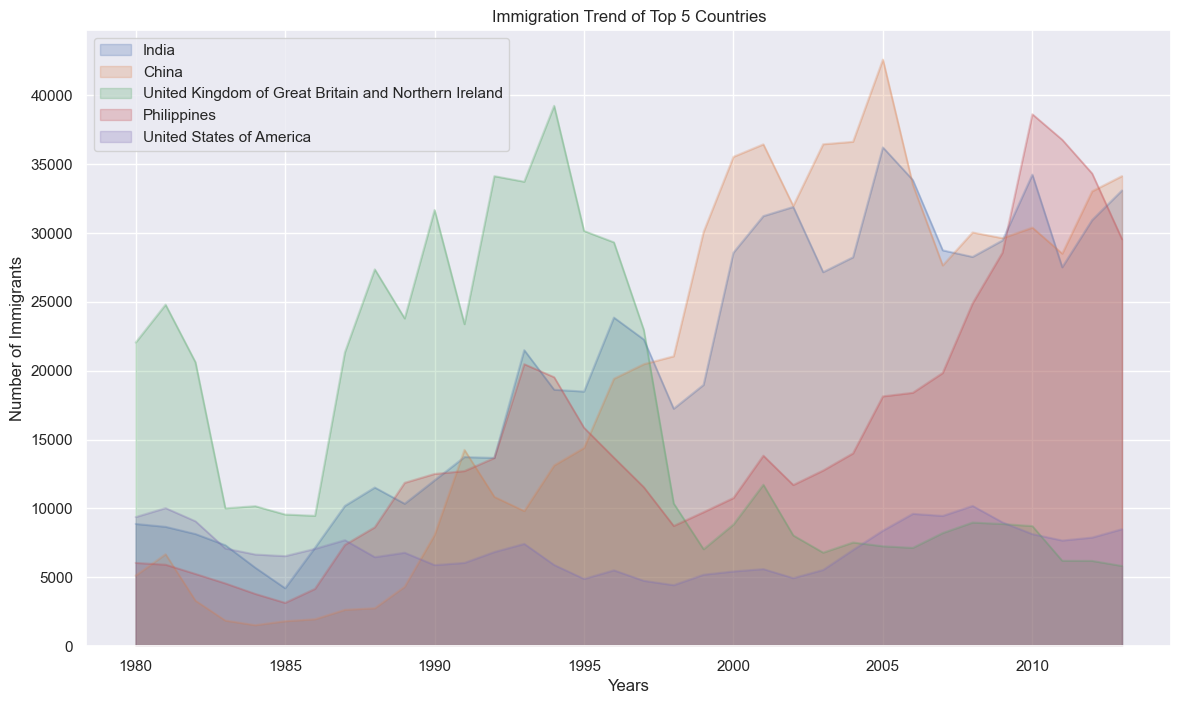

In [37]:
ax = df_top5.plot(kind='area', stacked=False, figsize=(14,8), alpha=0.25)
ax.set_title('Immigration Trend of Top 5 Countries') 
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
# plt.show()

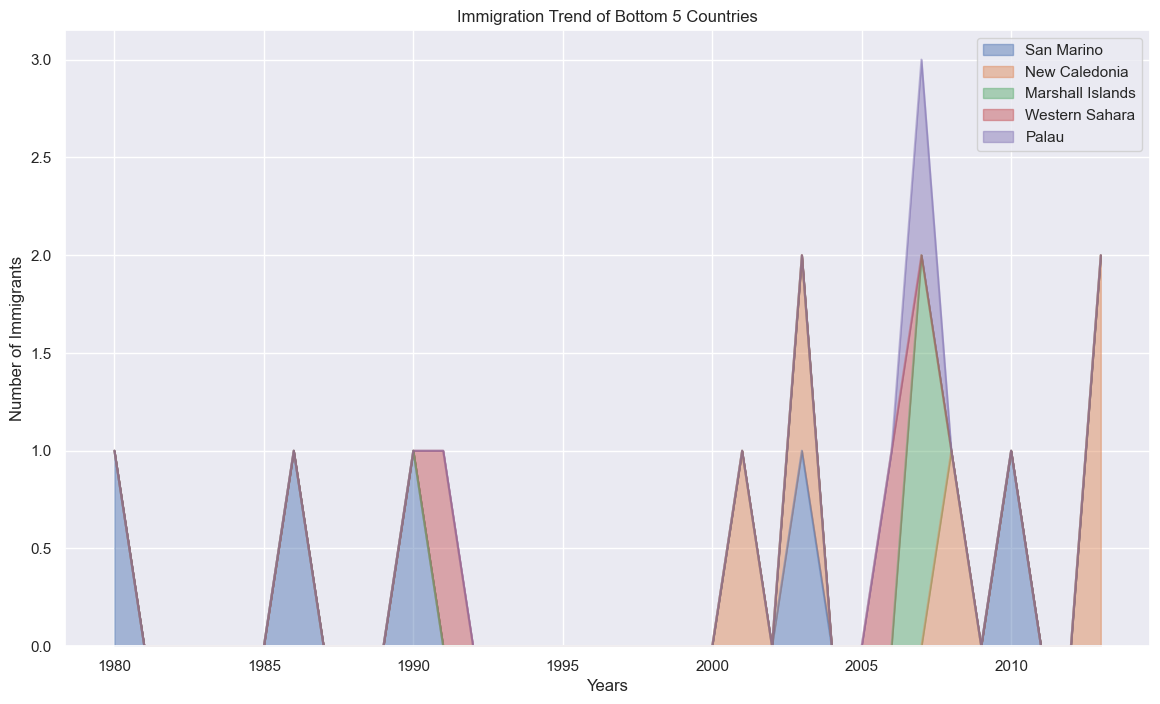

In [38]:
df_bot5 = df_can.tail()
df_bot5 = df_bot5 [years].transpose()
df_bot5.index = df_bot5.index.map(int)
df_bot5.plot(kind='area', figsize=(14, 8), alpha = 0.45)
plt.title('Immigration Trend of Bottom 5 Countries') 
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

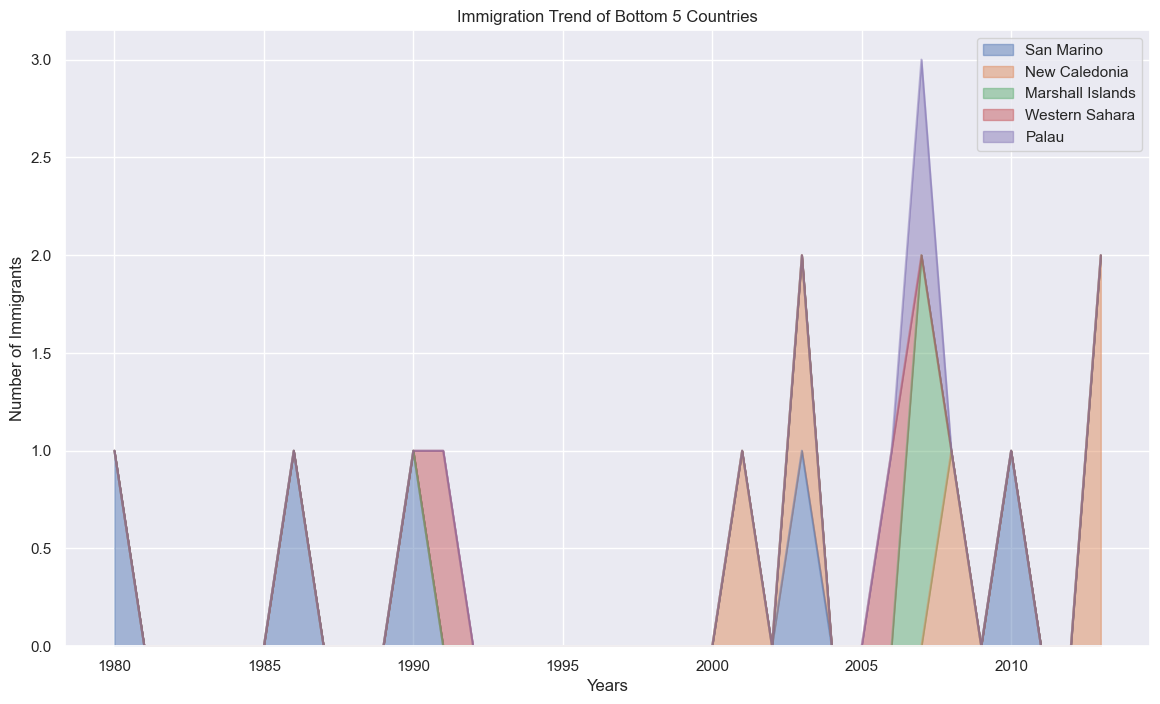

In [39]:
ax = df_bot5.plot(kind='area', figsize=(14, 8), alpha = 0.45)
ax.set_title('Immigration Trend of Bottom 5 Countries') 
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
plt.show()

## Histogram

In [40]:
df_can['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
United States of America                                 8501
Name: 2013, dtype: int64

In [42]:
count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Text(0.5, 0, 'Number of Immigrants')

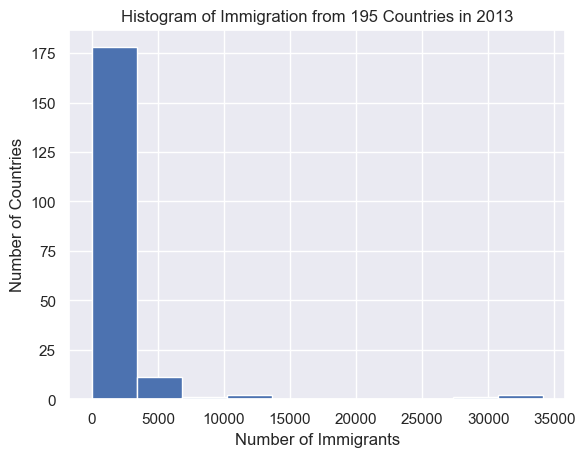

In [43]:
df_can['2013'].plot(kind='hist')
plt.title('Histogram of Immigration from 195 Countries in 2013') 
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

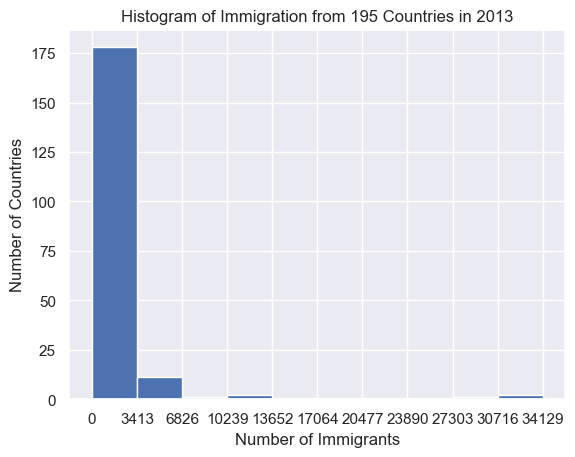

In [44]:
df_can['2013'].plot(kind='hist', xticks=bin_edges)
plt.title('Histogram of Immigration from 195 Countries in 2013') 
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

<Axes: ylabel='Frequency'>

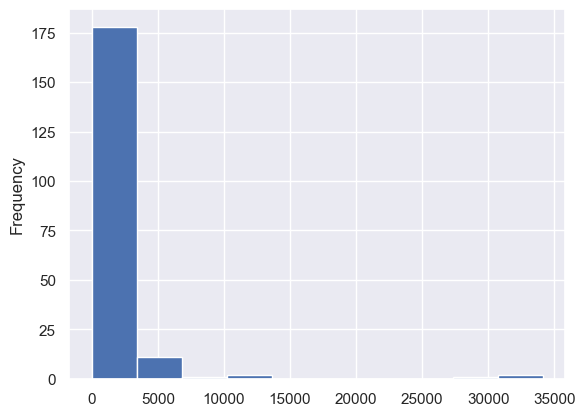

In [45]:
df_can['2013'].plot.hist()

<Axes: ylabel='Frequency'>

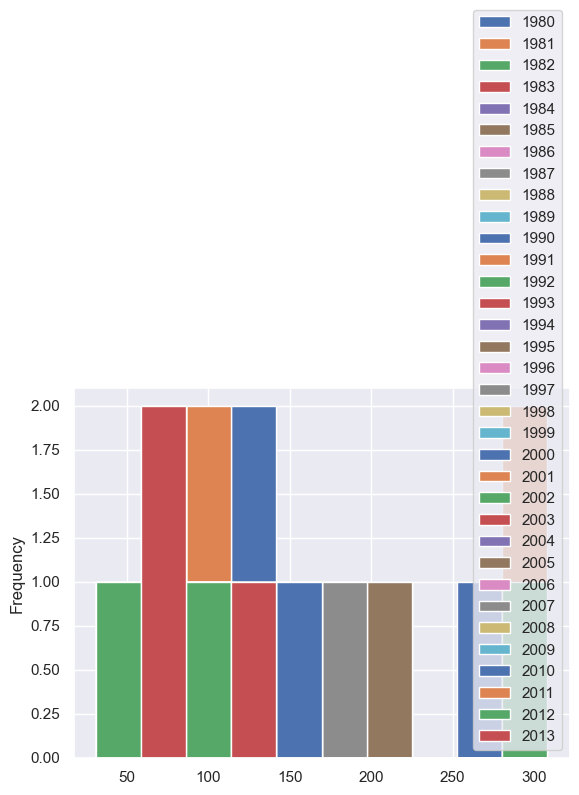

In [46]:
df_can.loc[['Denmark','Norway','Sweden'], years].plot.hist()

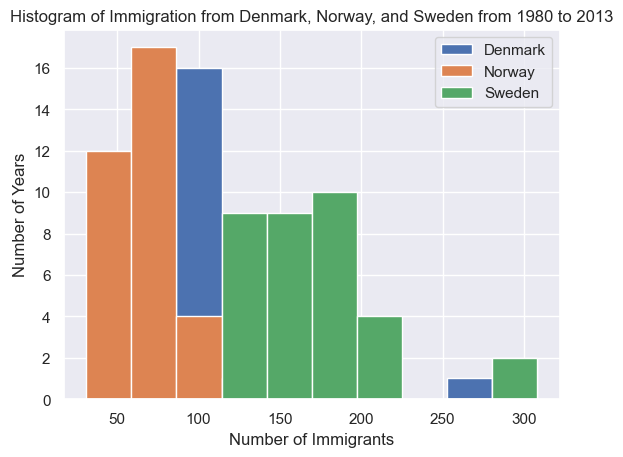

In [47]:
df_can.loc[['Denmark','Norway','Sweden'], years].T.plot.hist()
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 to 2013') 
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

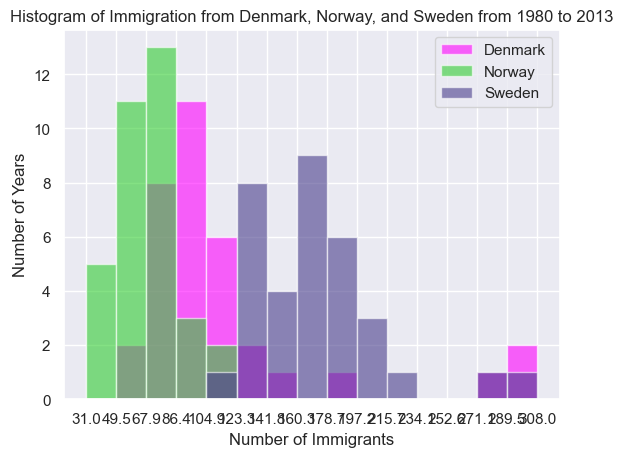

In [48]:
count, bin_edges = np.histogram(df_can.loc[['Denmark','Norway','Sweden'], years].T, 15)

df_can.loc[['Denmark','Norway','Sweden'], years].T.plot.hist(
    bins = len(count), 
    xticks=bin_edges, 
    alpha = 0.6,
    color = ['magenta','limegreen','darkslateblue'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 to 2013') 
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

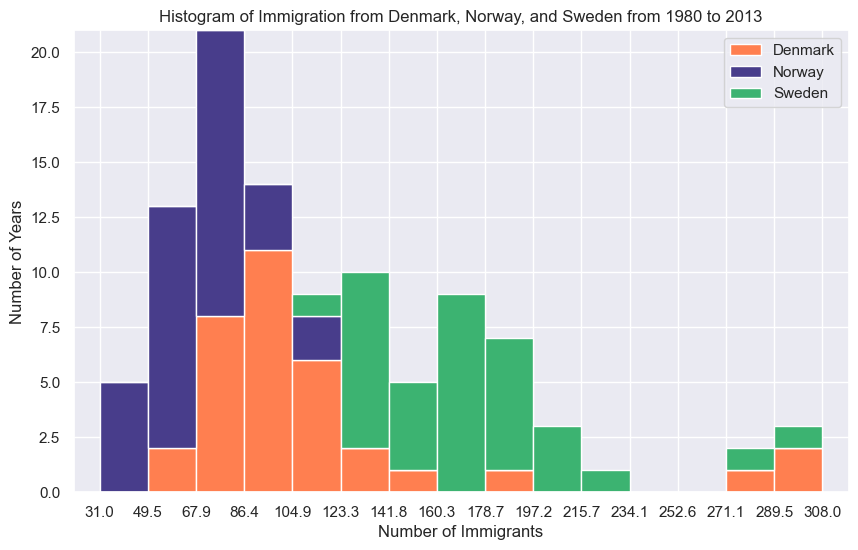

In [55]:
count, bin_edges = np.histogram(df_can.loc[['Denmark','Norway','Sweden'], years].T, 15)
xmin = bin_edges[0] - 10 # first bin value is 31.0, adding buffer of 10 foraesthetic purposes
xmax = bin_edges[-1] + 10 # last bin value is 308.0, adding buffer of 10 foraesthetic purposes

# stacked Histogram
df_can.loc[['Denmark','Norway','Sweden'], years].T.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
                                                       )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 to 2013') 
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

In [56]:
xmax

318.0

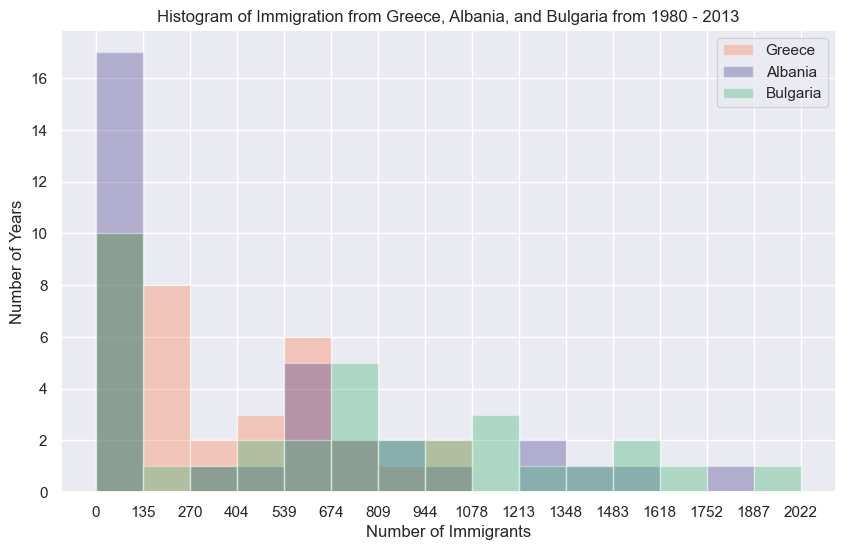

In [57]:
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_cof = df_cof.transpose()
count, bin_edges = np.histogram (df_cof, 15)
df_cof.plot(kind = 'hist',
figsize=(10, 6),
bins=15,
alpha=0.35,
xticks=bin_edges,
color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

## Bar Chart

### Vertical Bar Plot

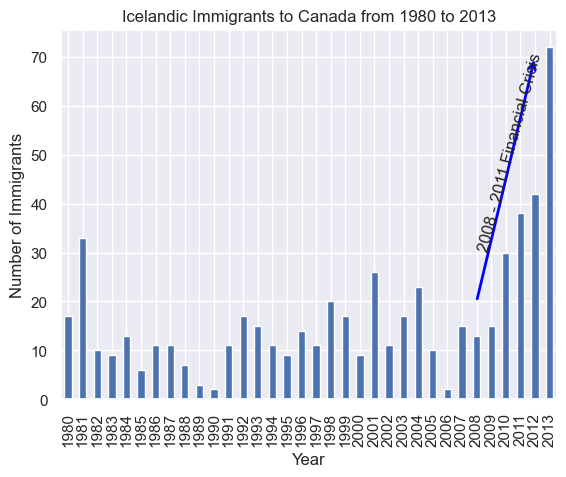

In [58]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.plot.bar()

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
# Annotate arrow
plt.annotate('', #s: str. will leave it blank for no text 
xy=(32, 70),     # place head of the arrow at point (year 2012, pop 70)           
xytext=(28, 20), # place base of the arrow at point (year 2008, pop 20)
xycoords='data', # will use the coordinate system of the object being annotated 
arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display # start the text at at point (year 2008, pop 30)
xy=(28, 30),
rotation=75,   # based on trial and error to match the arrow
va='bottom', # want the text to be vertically 'bottom' aligned 
ha='left', # want the text to be horizontally'left' algned.
            )

plt.show()

### Horizontal Bar Plot

<Axes: >

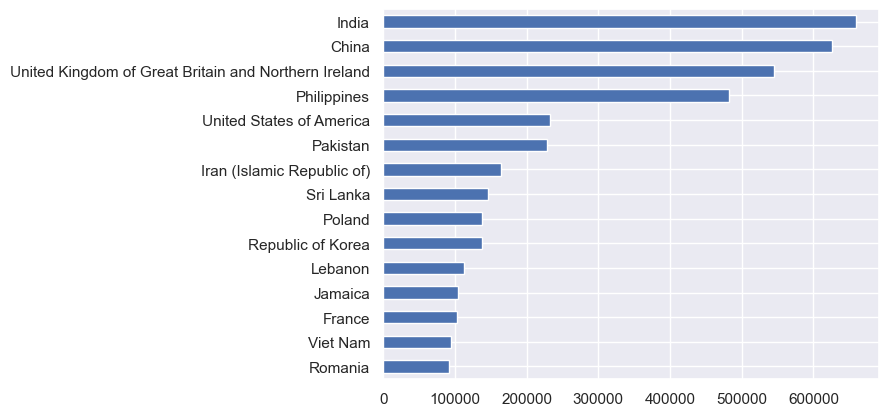

In [59]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15.plot.barh()

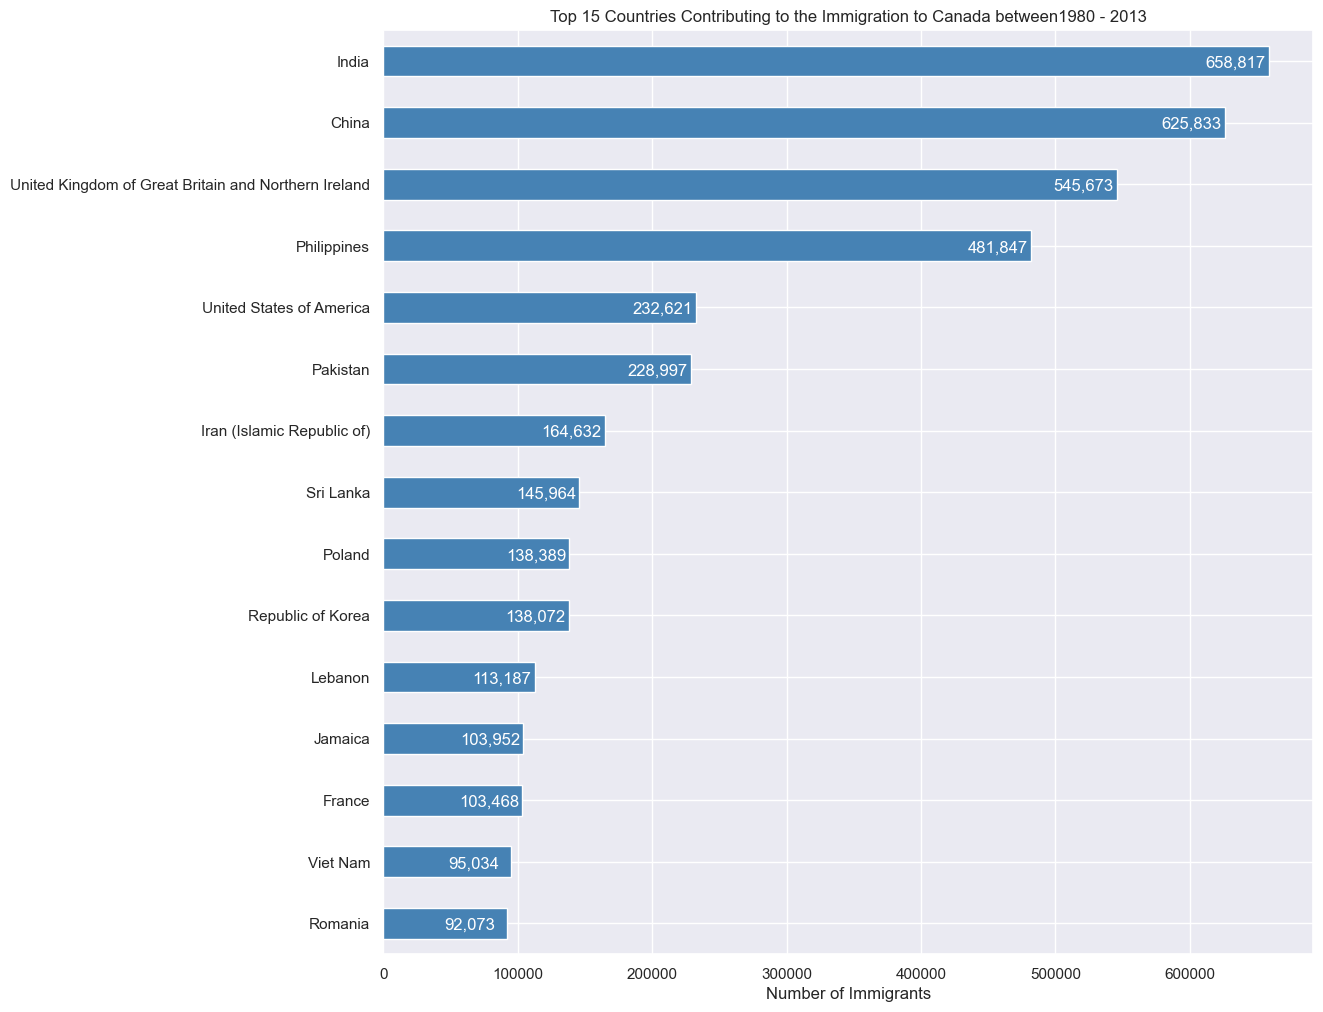

In [60]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between1980 - 2013')

for index, value in enumerate (df_top15):
    label = format(int(value), ',') # format int with commas
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

## Pie Chart

In [61]:
df_continents = df_can.groupby('Continent', axis = 0).sum()
df_continents

,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaMiddle AfricaWeste...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,580405
Asia,Southern AsiaWestern AsiaWestern AsiaEastern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3162719
Europe,Southern EuropeSouthern EuropeWestern EuropeWe...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1382256
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,740198
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,232639
Oceania,MicronesiaMicronesiaMelanesiaPolynesiaPolynesi...,Developing regionsDeveloping regionsDeveloping...,1942,1839,1675,1018,878,920,904,1200,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,53399


<Axes: ylabel='Total'>

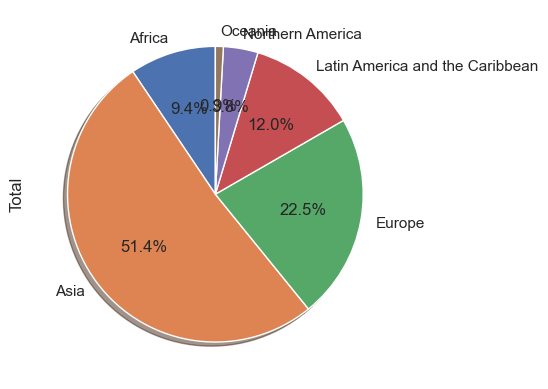

In [62]:
df_continents['Total'].plot(kind='pie',
                          autopct='%1.1f%%',
                          startangle = 90,
                          shadow=True)

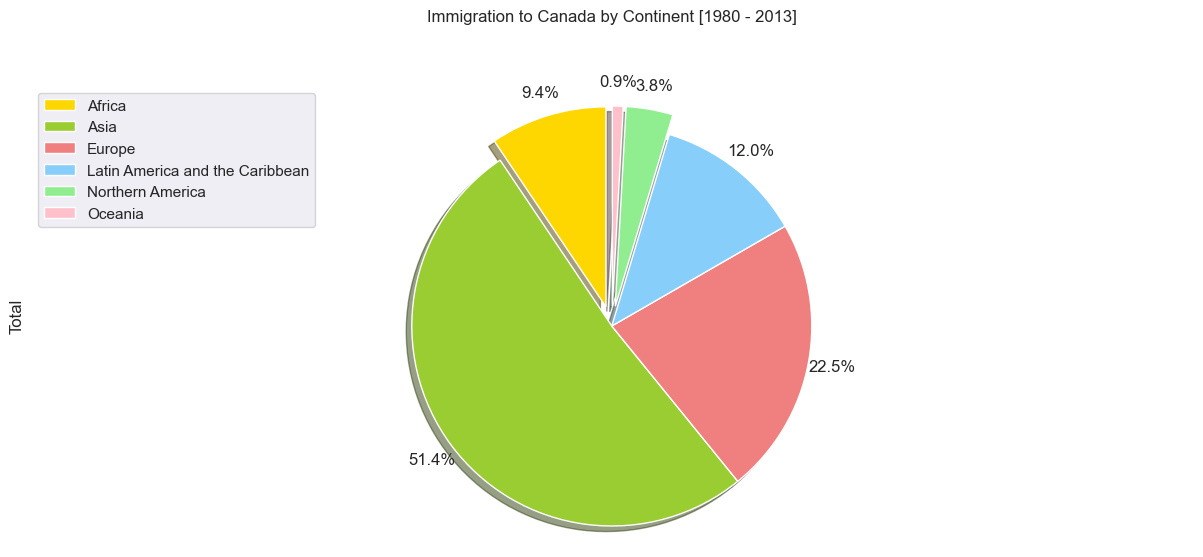

In [63]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which tooffset each wedge.
df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None, # turn off labels on pie chart
                            pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list, # add custom colors 
                            explode=explode_list # 'explode' lowest 3 continents
                           )

# scale the title up by 12% to match pctdistance 
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal')
# add legend
plt.legend (labels=df_continents.index, loc='upper left')
plt.show()

## Box Plot

<Axes: >

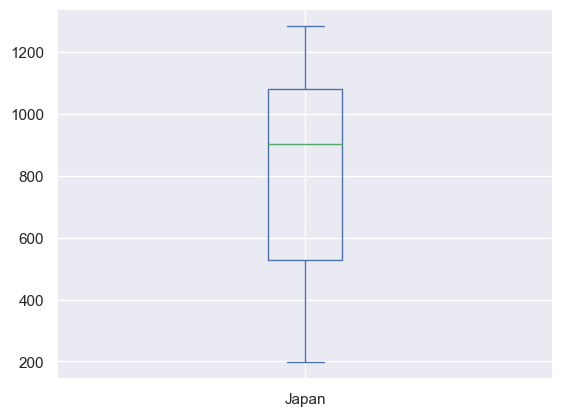

In [64]:
df_japan = df_can.loc['Japan', years]
df_japan.plot.box()

In [65]:
df_CI.describe()

,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


<Axes: >

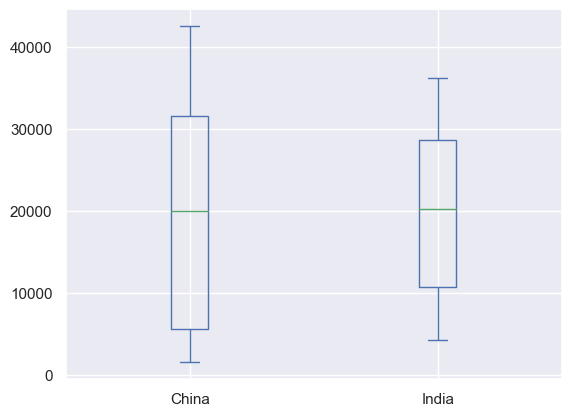

In [66]:
df_CI.plot.box()

<Axes: >

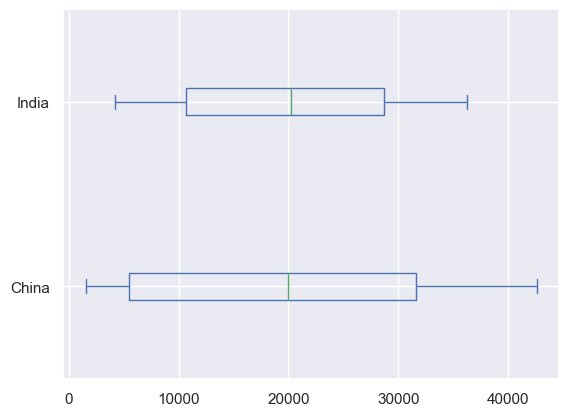

In [67]:
df_CI.plot.box(vert=False)

## SUbplots

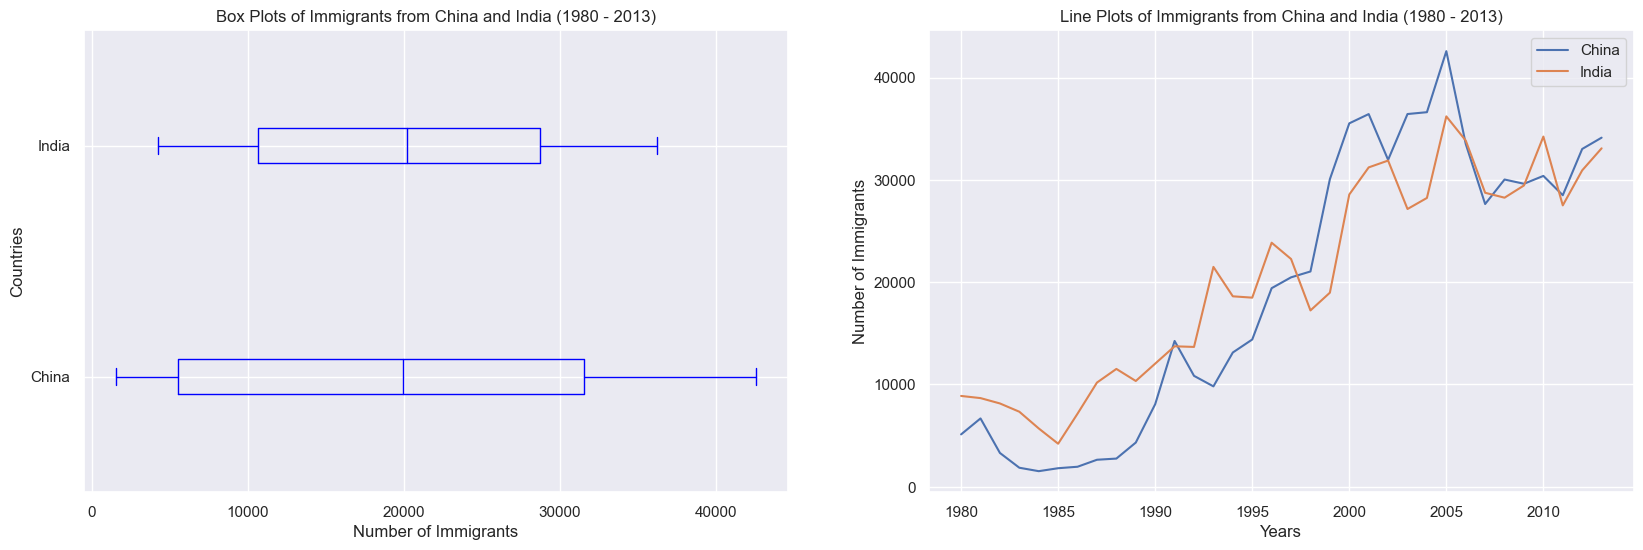

In [68]:
fig = plt.figure() # create figure
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot) .See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)') 
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2 
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')
plt.show()

In [69]:
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can.tail(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Romania,Europe,Eastern Europe,Developed regions,375,438,583,543,524,604,656,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,92073
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,95034
France,Europe,Western Europe,Developed regions,1729,2027,2219,1490,1169,1177,1298,...,4429,4002,4290,4532,5051,4646,4080,6280,5623,103468
Jamaica,Latin America and the Caribbean,Caribbean,Developing regions,3198,2634,2661,2455,2508,2938,4649,...,1945,1722,2141,2334,2456,2321,2059,2182,2479,103952
Lebanon,Asia,Western Asia,Developing regions,1409,1119,1159,789,1253,1683,2576,...,3709,3802,3467,3566,3077,3432,3072,1614,2172,113187
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,138072
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,...,1405,1263,1235,1267,1013,795,720,779,852,138389
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,145964
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,164632
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,228997


In [70]:
years_80s = list(map(str, range (1980, 1990)))
years_90s = list(map(str, range (1990, 2000)))
years_00s = list(map(str, range (2000, 2010)))

df_80s = df_top15.loc[:, years_80s].sum (axis=1)
df_90s = df_top15.loc[:, years_90s].sum (axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_00s})

new_df.head()

,1980s,1990s,2000s
Romania,7613,33659,45515
Viet Nam,30638,37726,21274
France,17137,30028,41297
Jamaica,34328,40329,22733
Lebanon,24918,49245,30906


In [71]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


<Axes: >

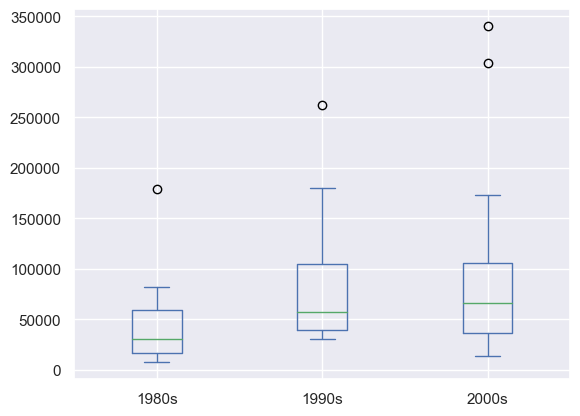

In [72]:
new_df.plot(kind='box')

## Scatter Plot

In [73]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
# change the years to type int (useful for regression later on) 
df_tot.index = map(int, df_tot.index)
# # reset the index to put in back in as a column in the df_tot dataframe 
df_tot.reset_index(inplace=True)
# # rename columns
df_tot.columns = ['year', 'total']
# # view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<Axes: xlabel='year', ylabel='total'>

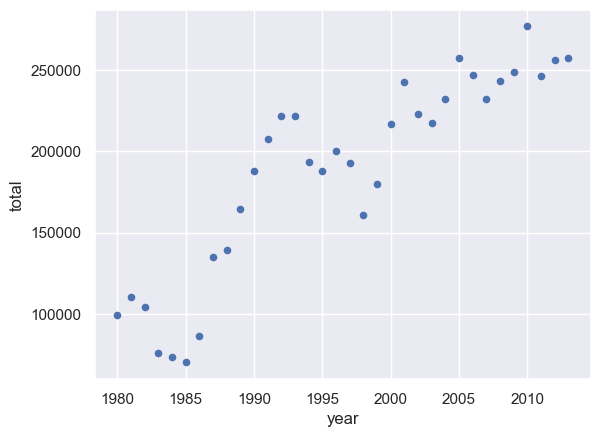

In [74]:
df_tot.plot.scatter(x='year', y='total')

In [75]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total ['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


<Axes: xlabel='year', ylabel='total'>

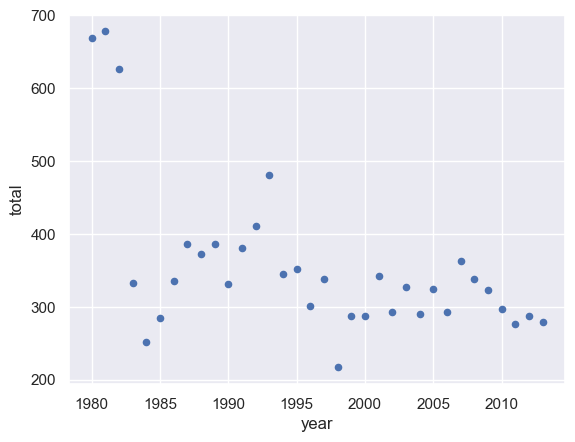

In [76]:
df_total.plot.scatter(x='year', y='total')